# **EXPLORATORY DATA ANALYSIS**

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

### Part 1: DataFrame Loading, Cleaning and Categorizing

In [3]:
carData = pd.read_csv('car_data.csv')
carData.sample(5)

,Unnamed: 0,LISTING_URL,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE
3732,3732,https://www.sgcarmart.com/used_cars/info.php?I...,Subaru,31800.0,14340.0,23-Nov-2015,NaN,2015,1208.0,Auto,18378.0,13/03/2024,14948.0,14948.0,59889.0,614.0,1995.0,1566.0,2.0,SUV
1678,1678,https://www.sgcarmart.com/used_cars/info.php?I...,Subaru,62800.0,16170.0,27-Mar-2017,NaN,2016,744.0,Auto,34027.0,13/03/2024,25326.0,27457.0,53300.0,1098.0,1600.0,1630.0,1.0,Stationwagon
3374,3374,https://www.sgcarmart.com/used_cars/info.php?I...,Renault,28800.0,12990.0,15-Jan-2016,110000.0,2015,1048.0,Auto,13648.0,13/03/2024,NaN,NaN,45002.0,366.0,1461.0,1314.0,1.0,Mid-Sized
1970,1970,https://www.sgcarmart.com/used_cars/info.php?I...,Mazda,50888.0,14340.0,26-Jan-2017,90000.0,2016,1210.0,Auto,27423.0,13/03/2024,19432.0,19432.0,54901.0,732.0,1998.0,1535.0,1.0,MPV
2675,2675,https://www.sgcarmart.com/used_cars/info.php?I...,Mercedes-Benz,61800.0,19420.0,17-Nov-2016,120000.0,2016,740.0,Auto,25503.0,13/03/2024,23217.0,19504.0,51507.0,973.0,1595.0,1395.0,3.0,Hatchback


In [4]:
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3985 entries, 0 to 3984
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    3985 non-null   int64  
 1   LISTING_URL                   3985 non-null   object 
 2   BRAND                         3985 non-null   object 
 3   PRICE                         3971 non-null   float64
 4   DEPRE_VALUE_PER_YEAR          3892 non-null   float64
 5   REG_DATE                      3985 non-null   object 
 6   MILEAGE_KM                    3362 non-null   float64
 7   MANUFACTURED_YEAR             3985 non-null   object 
 8   ROAD_TAX_PER_YEAR             3937 non-null   float64
 9   TRANSMISSION                  3977 non-null   object 
 10  DEREG_VALUE_FROM_SCRAPE_DATE  3746 non-null   float64
 11  SCRAPE_DATE                   3985 non-null   object 
 12  OMV                           3323 non-null   float64
 13  ARF

In [5]:
car_data1 = carData.drop(['LISTING_URL', 'SCRAPE_DATE'],axis=1)
car_data1.dropna(inplace=True)

In [6]:
car_data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2528 entries, 0 to 3983
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    2528 non-null   int64  
 1   BRAND                         2528 non-null   object 
 2   PRICE                         2528 non-null   float64
 3   DEPRE_VALUE_PER_YEAR          2528 non-null   float64
 4   REG_DATE                      2528 non-null   object 
 5   MILEAGE_KM                    2528 non-null   float64
 6   MANUFACTURED_YEAR             2528 non-null   object 
 7   ROAD_TAX_PER_YEAR             2528 non-null   float64
 8   TRANSMISSION                  2528 non-null   object 
 9   DEREG_VALUE_FROM_SCRAPE_DATE  2528 non-null   float64
 10  OMV                           2528 non-null   float64
 11  ARF                           2528 non-null   float64
 12  COE_FROM_SCRAPE_DATE          2528 non-null   float64
 13  DAYS_OF_

In [7]:
car_data1.sample(5)

,Unnamed: 0,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE
2250,2250,Toyota,124800.0,29850.0,13-Jun-2017,112400.0,2017,1792.0,Auto,53689.0,45431.0,55604.0,54000.0,1155.0,2494.0,2065.0,3.0,MPV
3628,3628,Volkswagen,55888.0,15450.0,25-Oct-2016,118000.0,2016,976.0,Auto,33314.0,31375.0,30925.0,56410.0,941.0,1798.0,1480.0,3.0,Luxury Sedan
1786,1786,BMW,158800.0,17400.0,18-Aug-2022,17000.0,2022,684.0,Auto,92151.0,33582.0,24015.0,87889.0,3074.0,1499.0,1375.0,1.0,Luxury Sedan
3829,3829,Lexus,205800.0,27550.0,18-Jun-2020,84800.0,2020,1210.0,Auto,68559.0,52414.0,66346.0,32500.0,2284.0,1998.0,1890.0,1.0,SUV
3343,3343,Mercedes-Benz,203800.0,28310.0,05-Apr-2020,36500.0,2019,1202.0,Auto,68088.0,51260.0,64268.0,32801.0,2192.0,1991.0,2460.0,1.0,MPV


In [8]:
(car_data1['BRAND'].value_counts())

BRAND
Mercedes-Benz    338
BMW              318
Toyota           298
Honda            270
Audi             151
Volkswagen       126
Nissan            97
Porsche           96
Hyundai           83
Mazda             81
Subaru            70
Kia               69
Mitsubishi        58
Volvo             56
Lexus             55
MINI              32
Jaguar            25
Land              24
Skoda             21
Peugeot           18
Suzuki            17
SEAT              17
Maserati          15
Ferrari           15
Citroen           14
2018              14
Opel              12
Ford              12
Bentley           11
Infiniti          10
2016              10
Rolls-Royce       10
2019               9
Chevrolet          9
Lamborghini        9
2017               7
MG                 6
Renault            6
McLaren            5
2010               4
Aston              4
2020               4
Jeep               4
Alfa               3
2021               2
Ssangyong          2
Alpine             2
2015   

We noticed errors in the data, so we removed the values that were wrongly placed in the "BRAND" column.

In [9]:

car_data = car_data1[~car_data1.BRAND.str.contains(r'\d')]
car_data.sort_index()

car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2473 entries, 0 to 3983
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    2473 non-null   int64  
 1   BRAND                         2473 non-null   object 
 2   PRICE                         2473 non-null   float64
 3   DEPRE_VALUE_PER_YEAR          2473 non-null   float64
 4   REG_DATE                      2473 non-null   object 
 5   MILEAGE_KM                    2473 non-null   float64
 6   MANUFACTURED_YEAR             2473 non-null   object 
 7   ROAD_TAX_PER_YEAR             2473 non-null   float64
 8   TRANSMISSION                  2473 non-null   object 
 9   DEREG_VALUE_FROM_SCRAPE_DATE  2473 non-null   float64
 10  OMV                           2473 non-null   float64
 11  ARF                           2473 non-null   float64
 12  COE_FROM_SCRAPE_DATE          2473 non-null   float64
 13  DAYS_OF_

In [10]:
car_data['BRAND'].value_counts()

BRAND
Mercedes-Benz    338
BMW              318
Toyota           298
Honda            270
Audi             151
Volkswagen       126
Nissan            97
Porsche           96
Hyundai           83
Mazda             81
Subaru            70
Kia               69
Mitsubishi        58
Volvo             56
Lexus             55
MINI              32
Jaguar            25
Land              24
Skoda             21
Peugeot           18
SEAT              17
Suzuki            17
Maserati          15
Ferrari           15
Citroen           14
Opel              12
Ford              12
Bentley           11
Rolls-Royce       10
Infiniti          10
Lamborghini        9
Chevrolet          9
MG                 6
Renault            6
McLaren            5
Aston              4
Jeep               4
Alfa               3
Alpine             2
Ssangyong          2
Mercedes           1
Chrysler           1
Daihatsu           1
RUF                1
Name: count, dtype: int64

Converting Transmission -> 1  for auto, 0  for manual

In [11]:
car_data['TRANSMISSION'].value_counts()

TRANSMISSION
Auto      2442
Manual      31
Name: count, dtype: int64

In [12]:
car_data['TRANSMISSION_CONVERT'] = car_data['TRANSMISSION'].apply(lambda x: 1 if x=='Auto' else 0)
car_data.drop('TRANSMISSION', axis=1, inplace=True)
car_data.rename(columns={'TRANSMISSION_CONVERT':"TRANSMISSION"},inplace=True)
car_data.sample(5)

/var/folders/fx/gp1zzxcd0fndp32krvlpz7wr0000gn/T/ipykernel_79122/2070663087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data['TRANSMISSION_CONVERT'] = car_data['TRANSMISSION'].apply(lambda x: 1 if x=='Auto' else 0)
/var/folders/fx/gp1zzxcd0fndp32krvlpz7wr0000gn/T/ipykernel_79122/2070663087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data.drop('TRANSMISSION', axis=1, inplace=True)
/var/folders/fx/gp1zzxcd0fndp32krvlpz7wr0000gn/T/ipykernel_79122/2070663087.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,Unnamed: 0,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE,TRANSMISSION
73,73,Infiniti,65500.0,16510.0,08-Nov-2016,108800.0,2016,1202.0,41106.0,36670.0,43338.0,56889.0,945.0,1991.0,1540.0,2.0,Hatchback,1
2163,2163,Audi,100888.0,16880.0,29-Jun-2019,66000.0,2018,392.0,33097.0,22100.0,22940.0,30009.0,1920.0,999.0,1280.0,3.0,Luxury Sedan,1
40,40,Volkswagen,143988.0,15550.0,10-Mar-2023,15900.0,2022,392.0,85401.0,22380.0,8332.0,88000.0,2954.0,999.0,1369.0,1.0,SUV,1
3565,3565,Honda,73777.0,13520.0,18-Oct-2018,30196.0,2018,182.0,20147.0,22256.0,23159.0,8556.0,1674.0,1496.0,1190.0,1.0,SUV,1
3846,3846,Mercedes-Benz,107800.0,18460.0,26-Mar-2019,112000.0,2018,586.0,40893.0,26934.0,29708.0,36961.0,1827.0,1332.0,1365.0,2.0,Hatchback,1


In [13]:
#whitespace stripping 
car_data['VEHICLE_TYPE'].apply(str.strip)
car_data['VEHICLE_TYPE'].apply(str.lstrip)

car_data['VEHICLE_TYPE'].value_counts()

VEHICLE_TYPE
SUV                669
Luxury Sedan       540
Mid-Sized Sedan    346
Sports Car         320
Hatchback          307
MPV                248
Stationwagon        43
Name: count, dtype: int64

#### Now, we try to get the age of the cars using datetime conversion so we can use it as a predictor variable

In [14]:
#converting reg_date to datetime and Manufactured_year to int since it is an obj 
car_data['REG_DATE'] = pd.to_datetime(car_data['REG_DATE'])
car_data['MANUFACTURED_YEAR'] = car_data['MANUFACTURED_YEAR'].astype(int)
car_data[['REG_DATE','MANUFACTURED_YEAR']].dtypes

/var/folders/fx/gp1zzxcd0fndp32krvlpz7wr0000gn/T/ipykernel_79122/3702485893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data['REG_DATE'] = pd.to_datetime(car_data['REG_DATE'])
/var/folders/fx/gp1zzxcd0fndp32krvlpz7wr0000gn/T/ipykernel_79122/3702485893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data['MANUFACTURED_YEAR'] = car_data['MANUFACTURED_YEAR'].astype(int)


REG_DATE             datetime64[ns]
MANUFACTURED_YEAR             int64
dtype: object

In [15]:
car_data.dtypes

Unnamed: 0                               int64
BRAND                                   object
PRICE                                  float64
DEPRE_VALUE_PER_YEAR                   float64
REG_DATE                        datetime64[ns]
MILEAGE_KM                             float64
MANUFACTURED_YEAR                        int64
ROAD_TAX_PER_YEAR                      float64
DEREG_VALUE_FROM_SCRAPE_DATE           float64
OMV                                    float64
ARF                                    float64
COE_FROM_SCRAPE_DATE                   float64
DAYS_OF_COE_LEFT                       float64
ENGINE_CAPACITY_CC                     float64
CURB_WEIGHT_KG                         float64
NO_OF_OWNERS                           float64
VEHICLE_TYPE                            object
TRANSMISSION                             int64
dtype: object

In [16]:
#run this cell once only
carData['SCRAPE_DATE'] = \
pd.to_datetime(carData['SCRAPE_DATE']).dt.year #convert scrape date to integer to perform operations on them

/var/folders/fx/gp1zzxcd0fndp32krvlpz7wr0000gn/T/ipykernel_79122/2758975572.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  pd.to_datetime(carData['SCRAPE_DATE']).dt.year #convert scrape date to integer to perform operations on them


In [17]:
carData['SCRAPE_DATE']

0       2024
1       2024
2       2024
3       2024
4       2024
        ... 
3980    2024
3981    2024
3982    2024
3983    2024
3984    2024
Name: SCRAPE_DATE, Length: 3985, dtype: int32

In [18]:
from datetime import date

car_data['CAR_AGE'] = carData['SCRAPE_DATE'] - car_data['MANUFACTURED_YEAR']
car_data['CAR_AGE'].astype(int)


/var/folders/fx/gp1zzxcd0fndp32krvlpz7wr0000gn/T/ipykernel_79122/2006181924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data['CAR_AGE'] = carData['SCRAPE_DATE'] - car_data['MANUFACTURED_YEAR']


0        6
1        8
2       16
4        6
5        8
        ..
3979     7
3980     8
3981     5
3982     7
3983     5
Name: CAR_AGE, Length: 2473, dtype: int64

In [19]:
car_data = car_data[['BRAND', 'PRICE','DEPRE_VALUE_PER_YEAR','MILEAGE_KM','COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 
                    'REG_DATE', 'MANUFACTURED_YEAR', 'CAR_AGE', 'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV', 'ARF', 
                    'ENGINE_CAPACITY_CC', 'ROAD_TAX_PER_YEAR', 'CURB_WEIGHT_KG',
                    'NO_OF_OWNERS', 'VEHICLE_TYPE', 'TRANSMISSION']]

car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2473 entries, 0 to 3983
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   BRAND                         2473 non-null   object        
 1   PRICE                         2473 non-null   float64       
 2   DEPRE_VALUE_PER_YEAR          2473 non-null   float64       
 3   MILEAGE_KM                    2473 non-null   float64       
 4   COE_FROM_SCRAPE_DATE          2473 non-null   float64       
 5   DAYS_OF_COE_LEFT              2473 non-null   float64       
 6   REG_DATE                      2473 non-null   datetime64[ns]
 7   MANUFACTURED_YEAR             2473 non-null   int64         
 8   CAR_AGE                       2473 non-null   float64       
 9   DEREG_VALUE_FROM_SCRAPE_DATE  2473 non-null   float64       
 10  OMV                           2473 non-null   float64       
 11  ARF                           2473 

### Part 2: Data Visualisation

<Axes: >

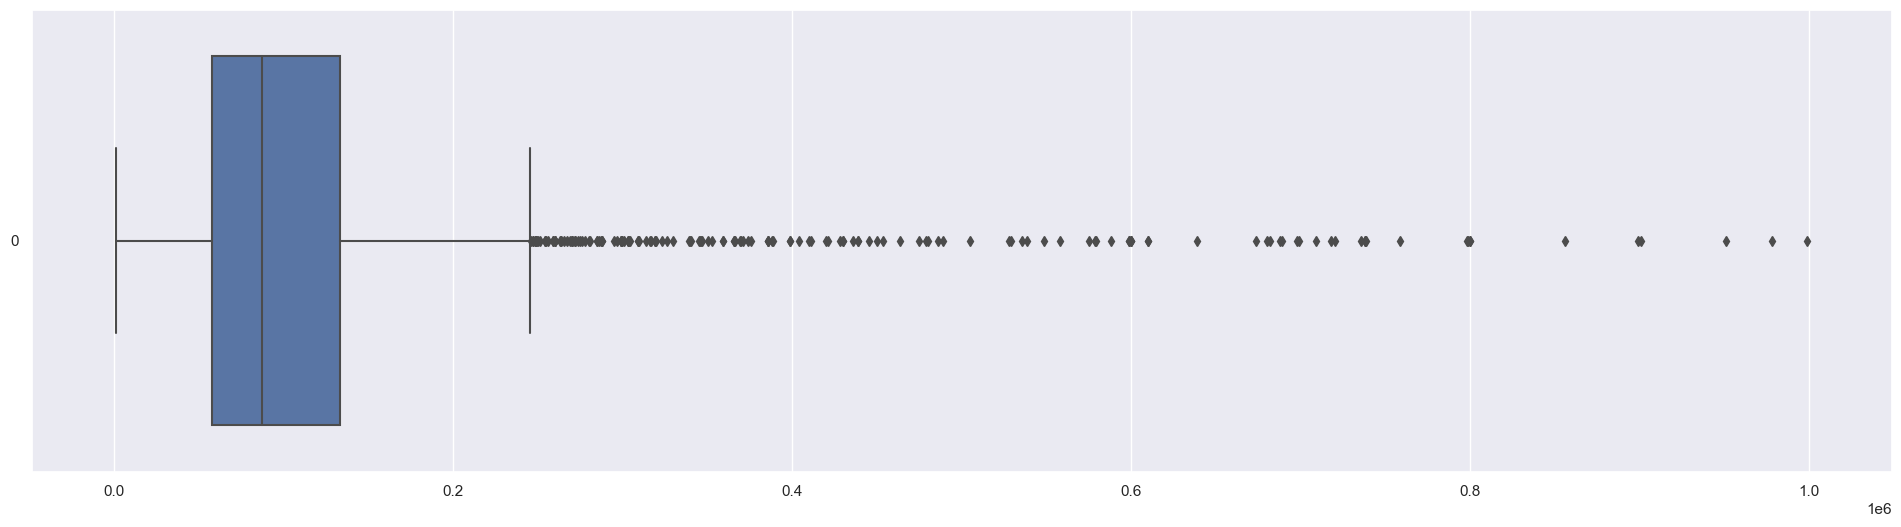

In [20]:
f=plt.figure(figsize=(24,6))
sb.boxplot(data=car_data["PRICE"], orient ='h')

<Axes: xlabel='PRICE', ylabel='Count'>

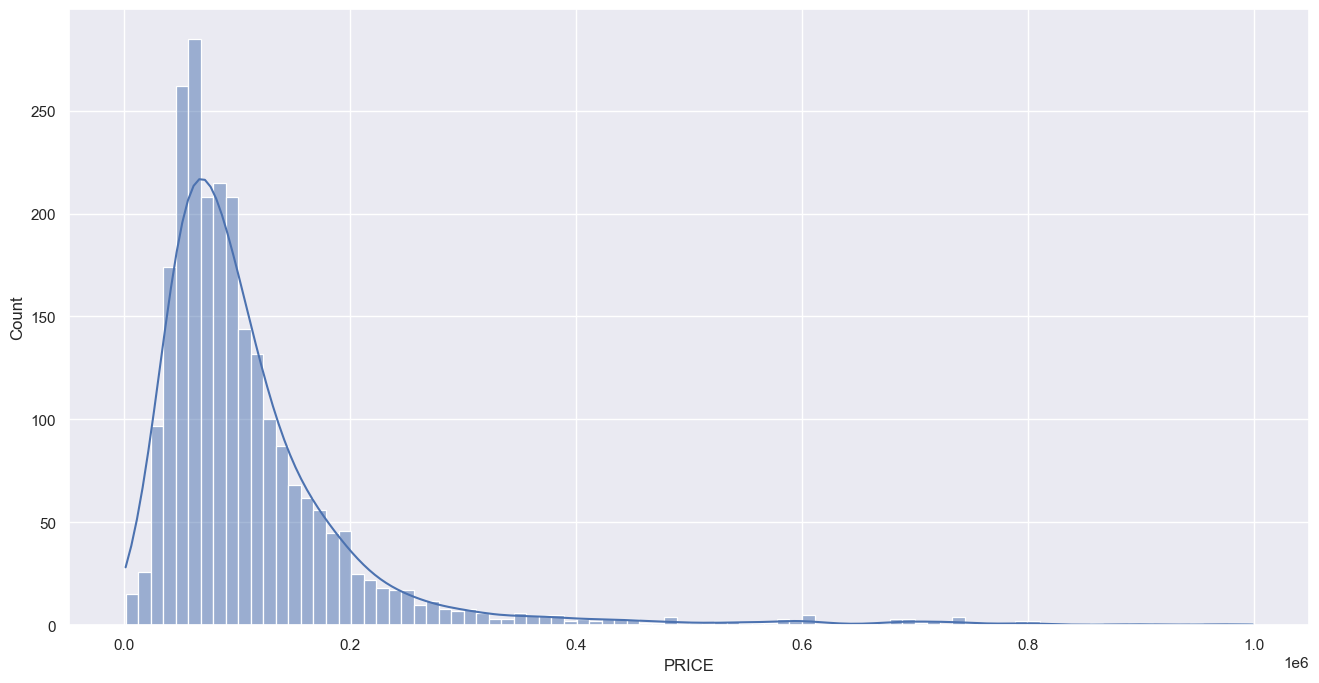

In [21]:
f= plt.figure(figsize=(16,8))
sb.histplot(data=car_data["PRICE"], kde=True)

In [22]:
numDF = car_data.select_dtypes(include= ['float','int64'])
numDF.describe()

,PRICE,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,MANUFACTURED_YEAR,CAR_AGE,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,ENGINE_CAPACITY_CC,ROAD_TAX_PER_YEAR,CURB_WEIGHT_KG,NO_OF_OWNERS,TRANSMISSION
count,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000
mean,114874.815204,21503.295592,85163.056207,48601.033967,1643.932875,2016.182370,7.817630,50552.886373,41243.758593,48736.252729,1959.168217,1354.379701,1487.202992,2.047311,0.987465
std,105711.416479,18488.745972,44365.036101,19051.375309,786.441768,3.750553,3.750553,58256.089894,47126.655291,71559.649483,809.486308,1238.184249,273.505943,1.238452,0.111280
min,1050.000000,9550.000000,10.000000,8501.000000,2.000000,2004.000000,1.000000,2384.000000,8264.000000,863.000000,659.000000,50.000000,840.000000,1.000000,0.000000
25%,57800.000000,14300.000000,54000.000000,35906.000000,1002.000000,2015.000000,5.000000,22978.000000,19589.000000,17853.000000,1496.000000,684.000000,1295.000000,1.000000,1.000000
50%,86888.000000,16790.000000,84000.000000,46667.000000,1557.000000,2017.000000,7.000000,34116.000000,28714.000000,30253.000000,1796.000000,1110.000000,1455.000000,2.000000,1.000000
75%,133000.000000,21900.000000,115000.000000,55001.000000,2225.000000,2019.000000,9.000000,56217.000000,43203.000000,50495.000000,1998.000000,1266.000000,1626.000000,3.000000,1.000000
max,998899.000000,319820.000000,304000.000000,146002.000000,3563.000000,2023.000000,20.000000,935423.000000,683397.000000,980594.000000,6749.000000,10725.000000,2819.000000,6.000000,1.000000


<Axes: >

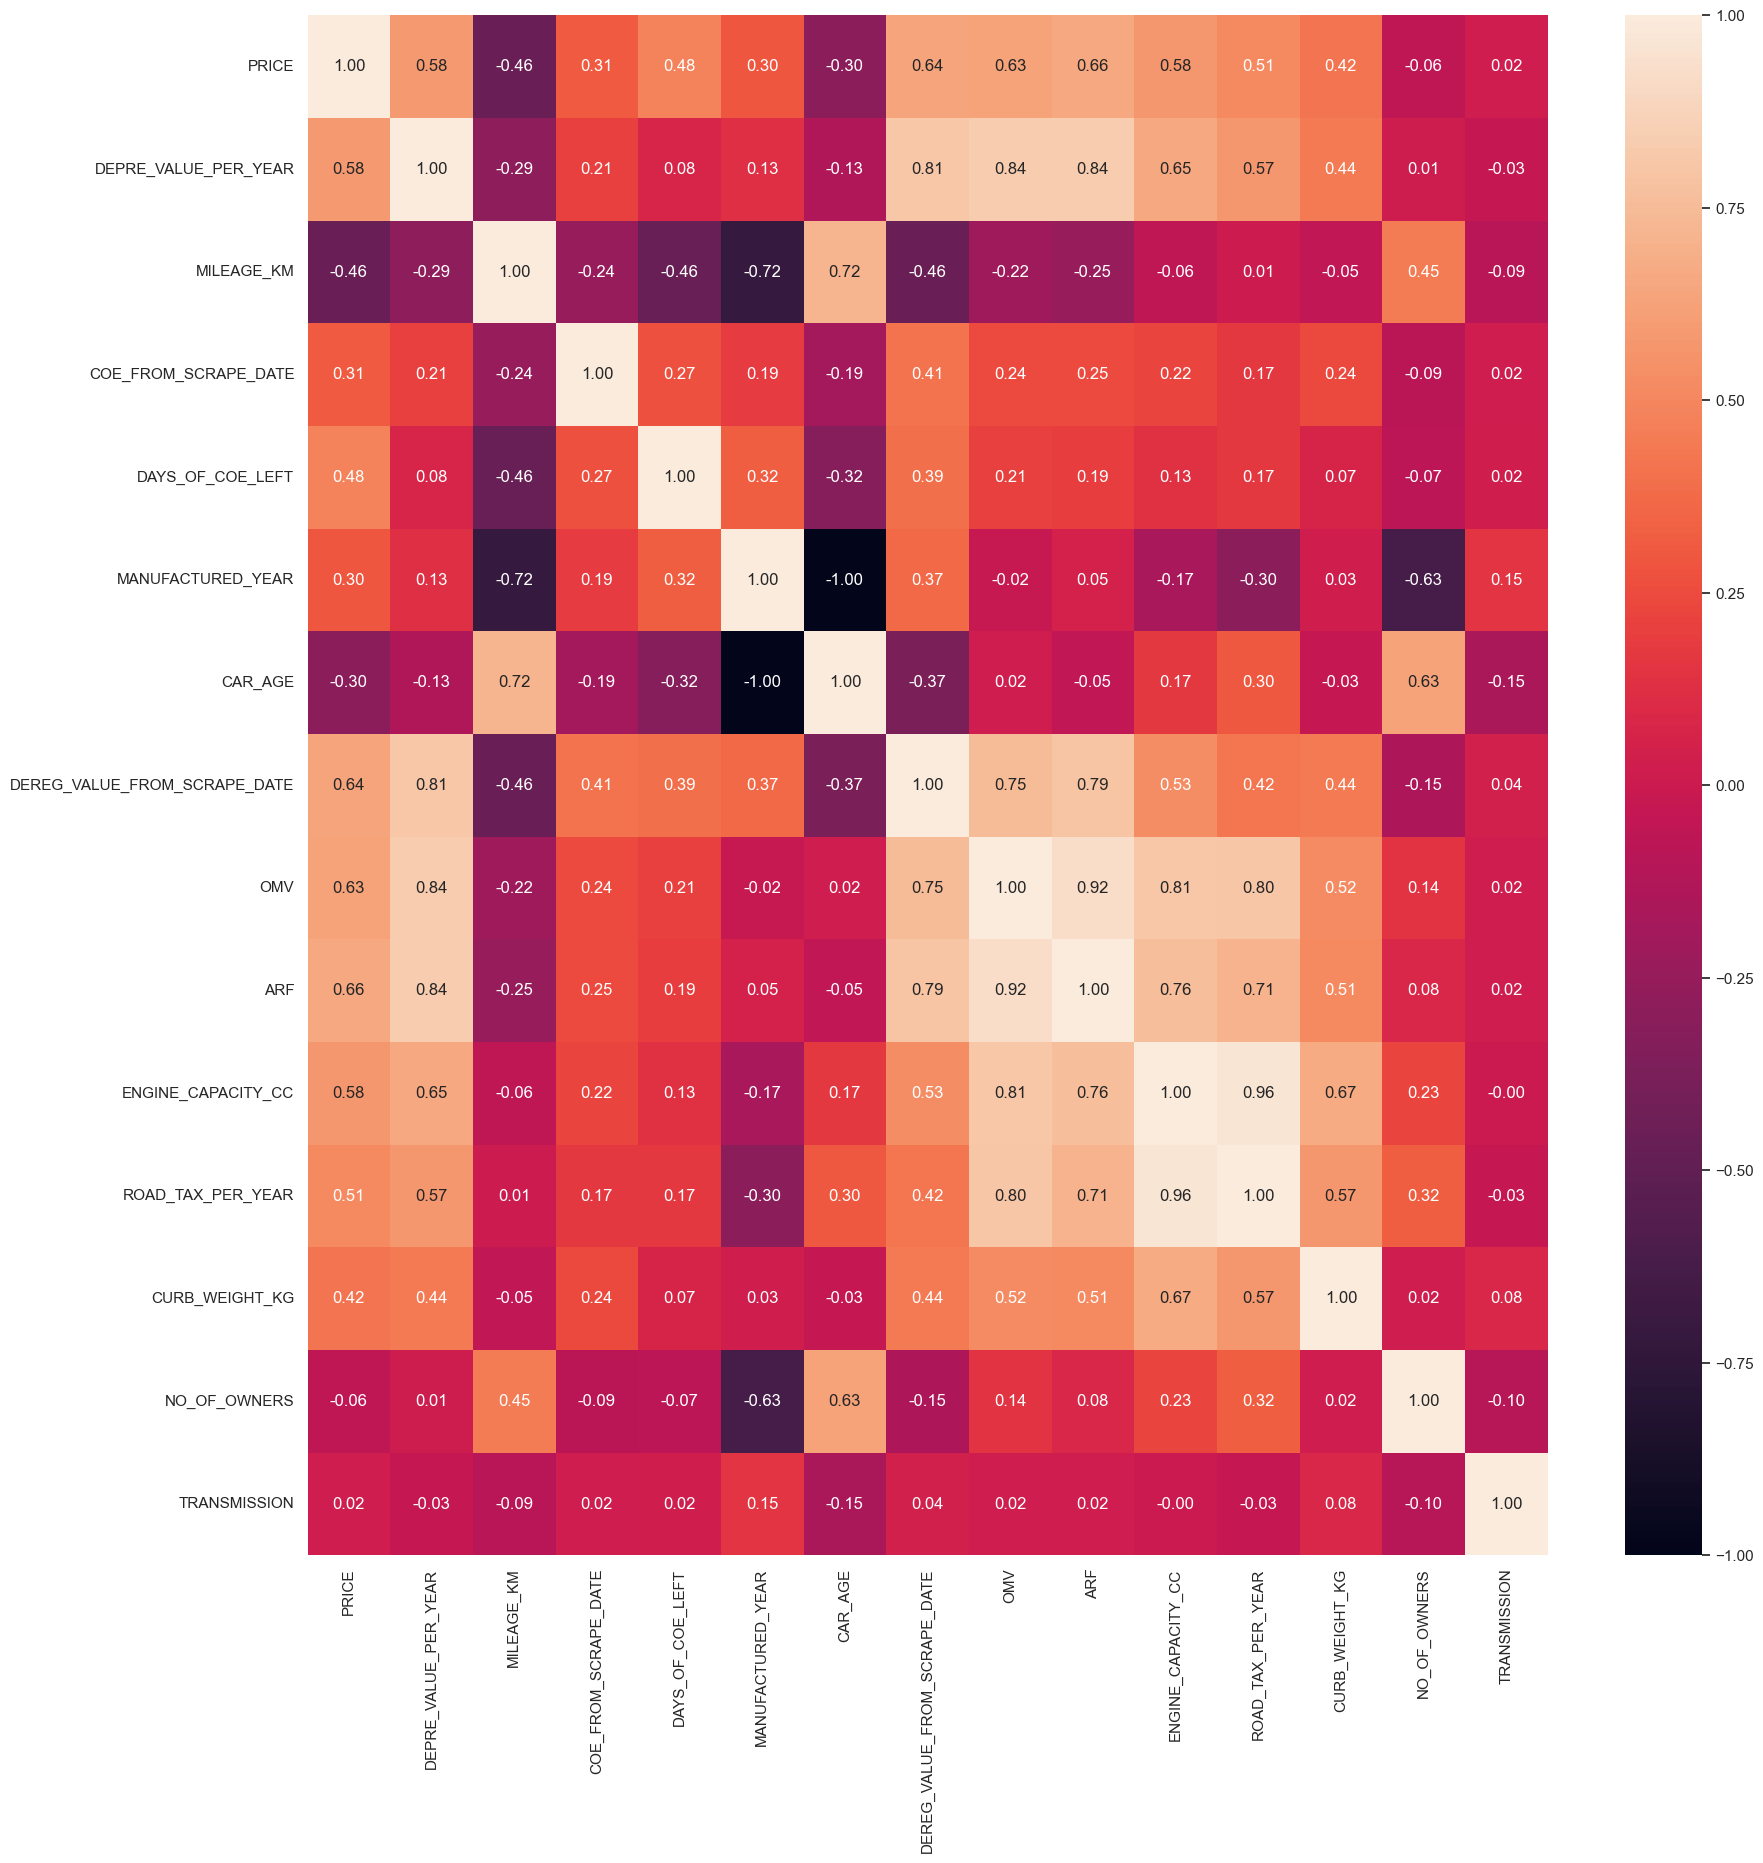

In [23]:
f = plt.figure(figsize=(20,20))
sb.heatmap(numDF.corr(),vmin=-1,vmax=1,annot=True,fmt=".2f")

From here we can see that OMV and ARF have a very high correlation (0.92) which is easily explained as ARF is calculated based on a percentage of OMV. We also observe that ENGINE_CAPACITY_CC and ROAD_TAX_PER_YEAR has a high correlation (0.96) since road tax is derived from engine capacity. As such, they would be explaining the same thing as predictor variables. Thus, we can drop some of these variables.


<Axes: >

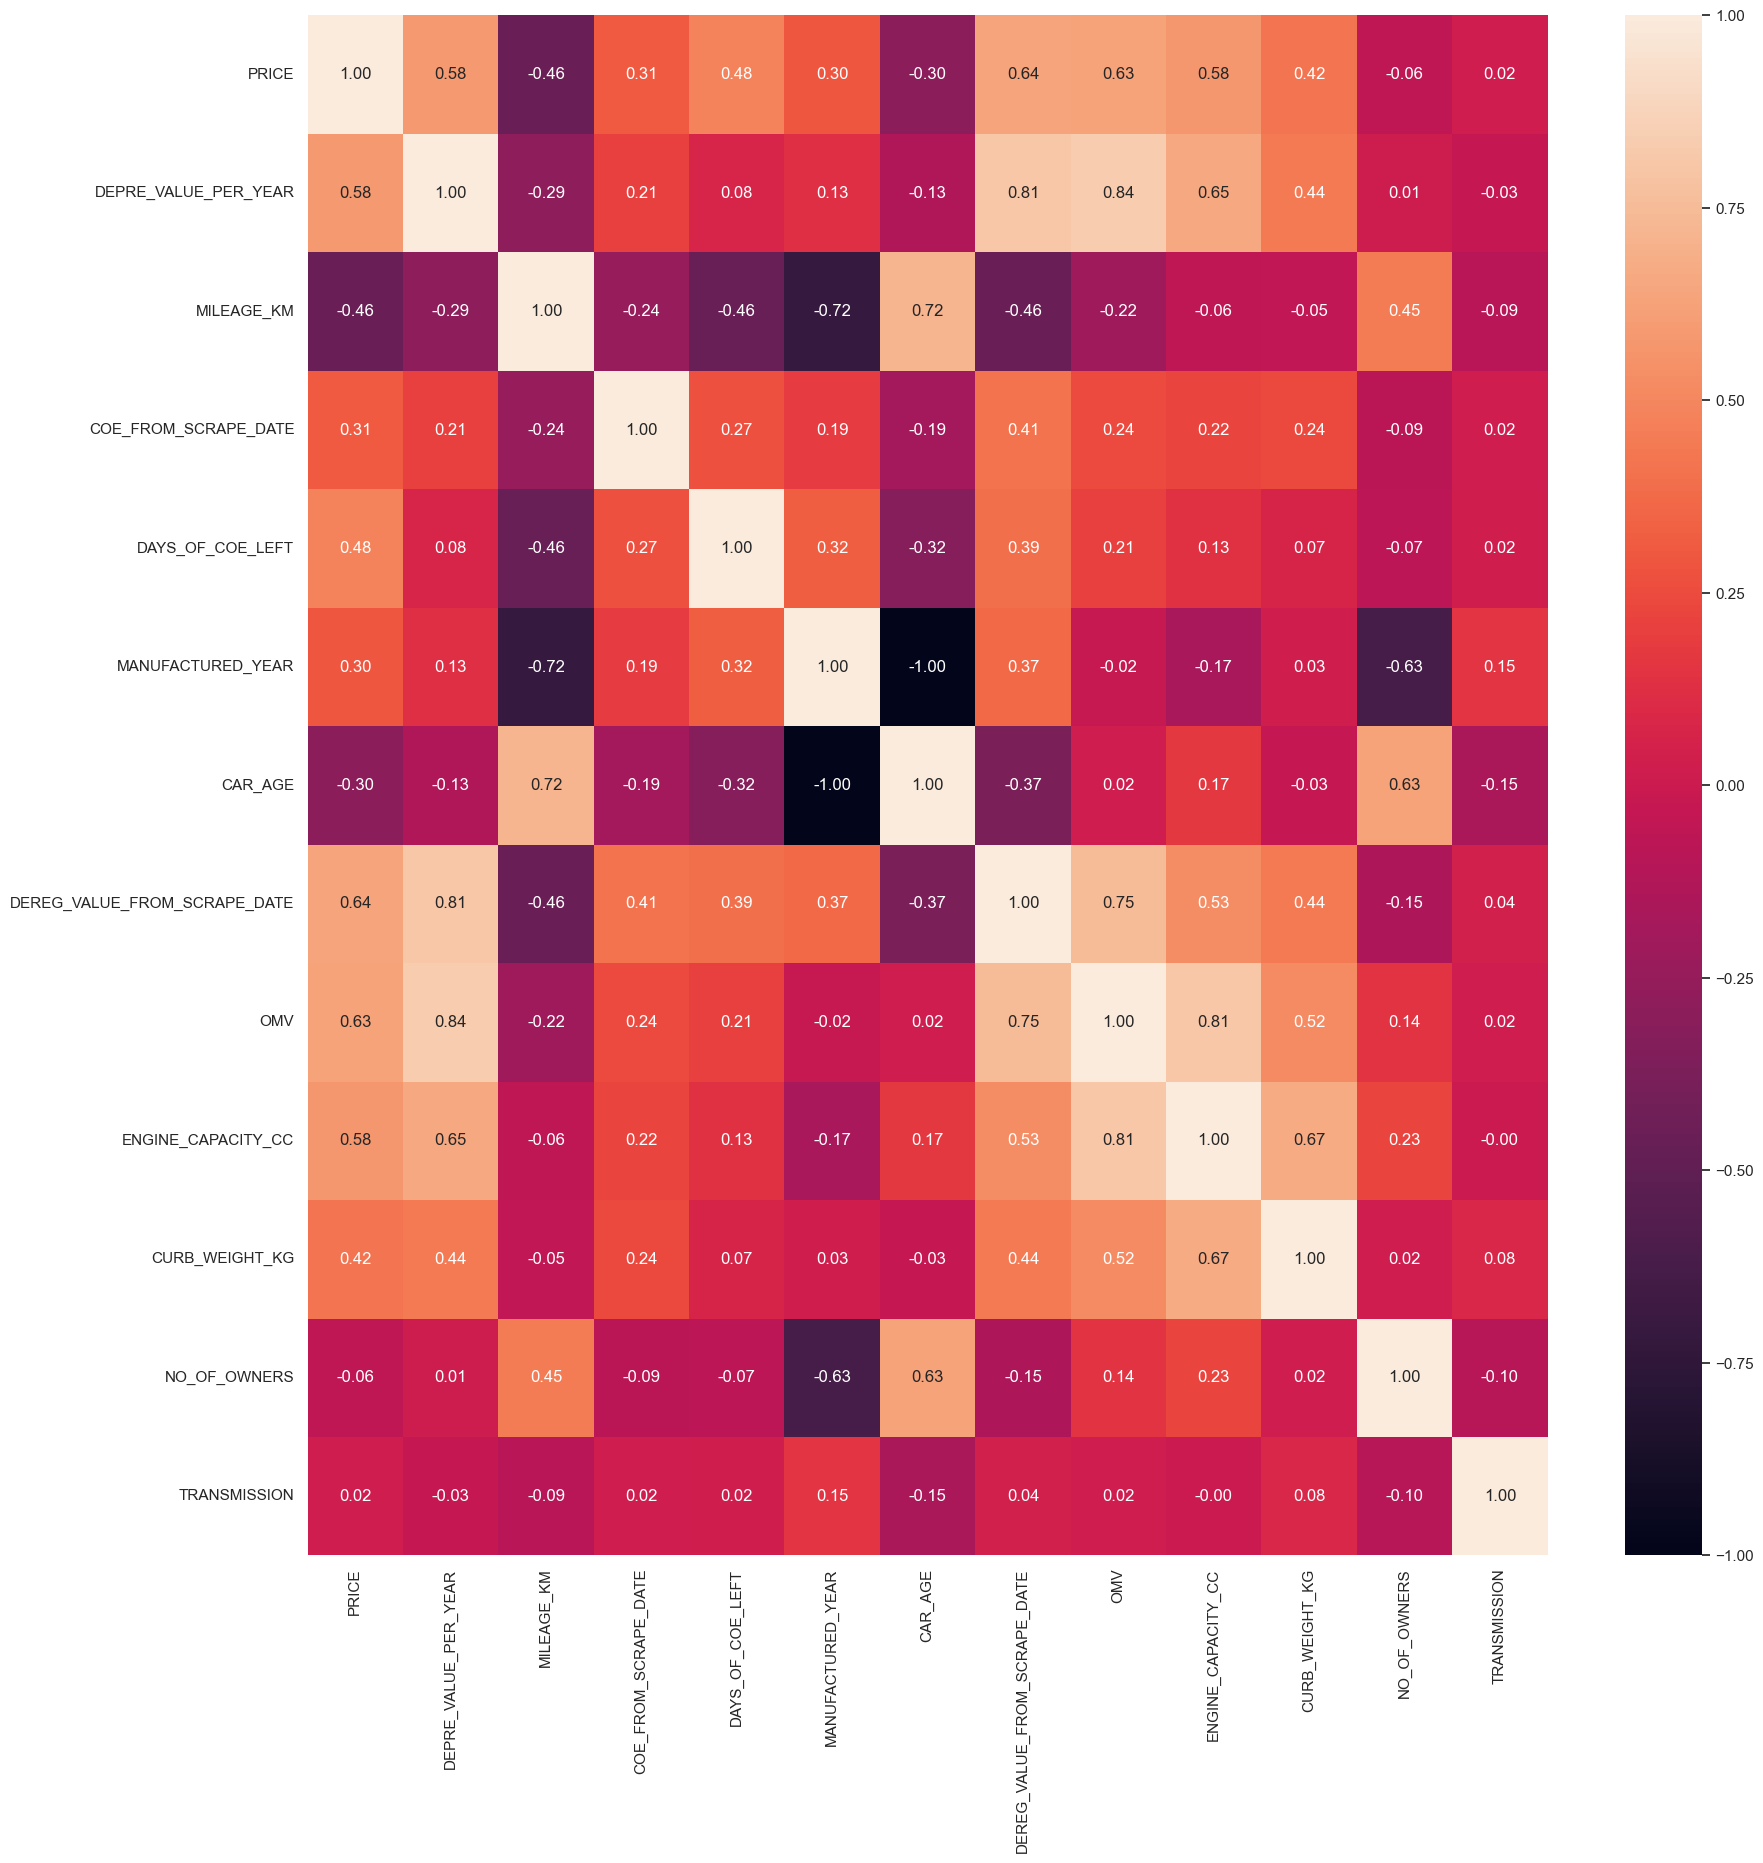

In [24]:
clean_df = numDF.drop(columns = ['ARF','ROAD_TAX_PER_YEAR'])
f = plt.figure(figsize = (20,20))
sb.heatmap(clean_df.corr(), vmin=-1,vmax=1,annot=True,fmt=".2f")

/Users/nathanpua/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


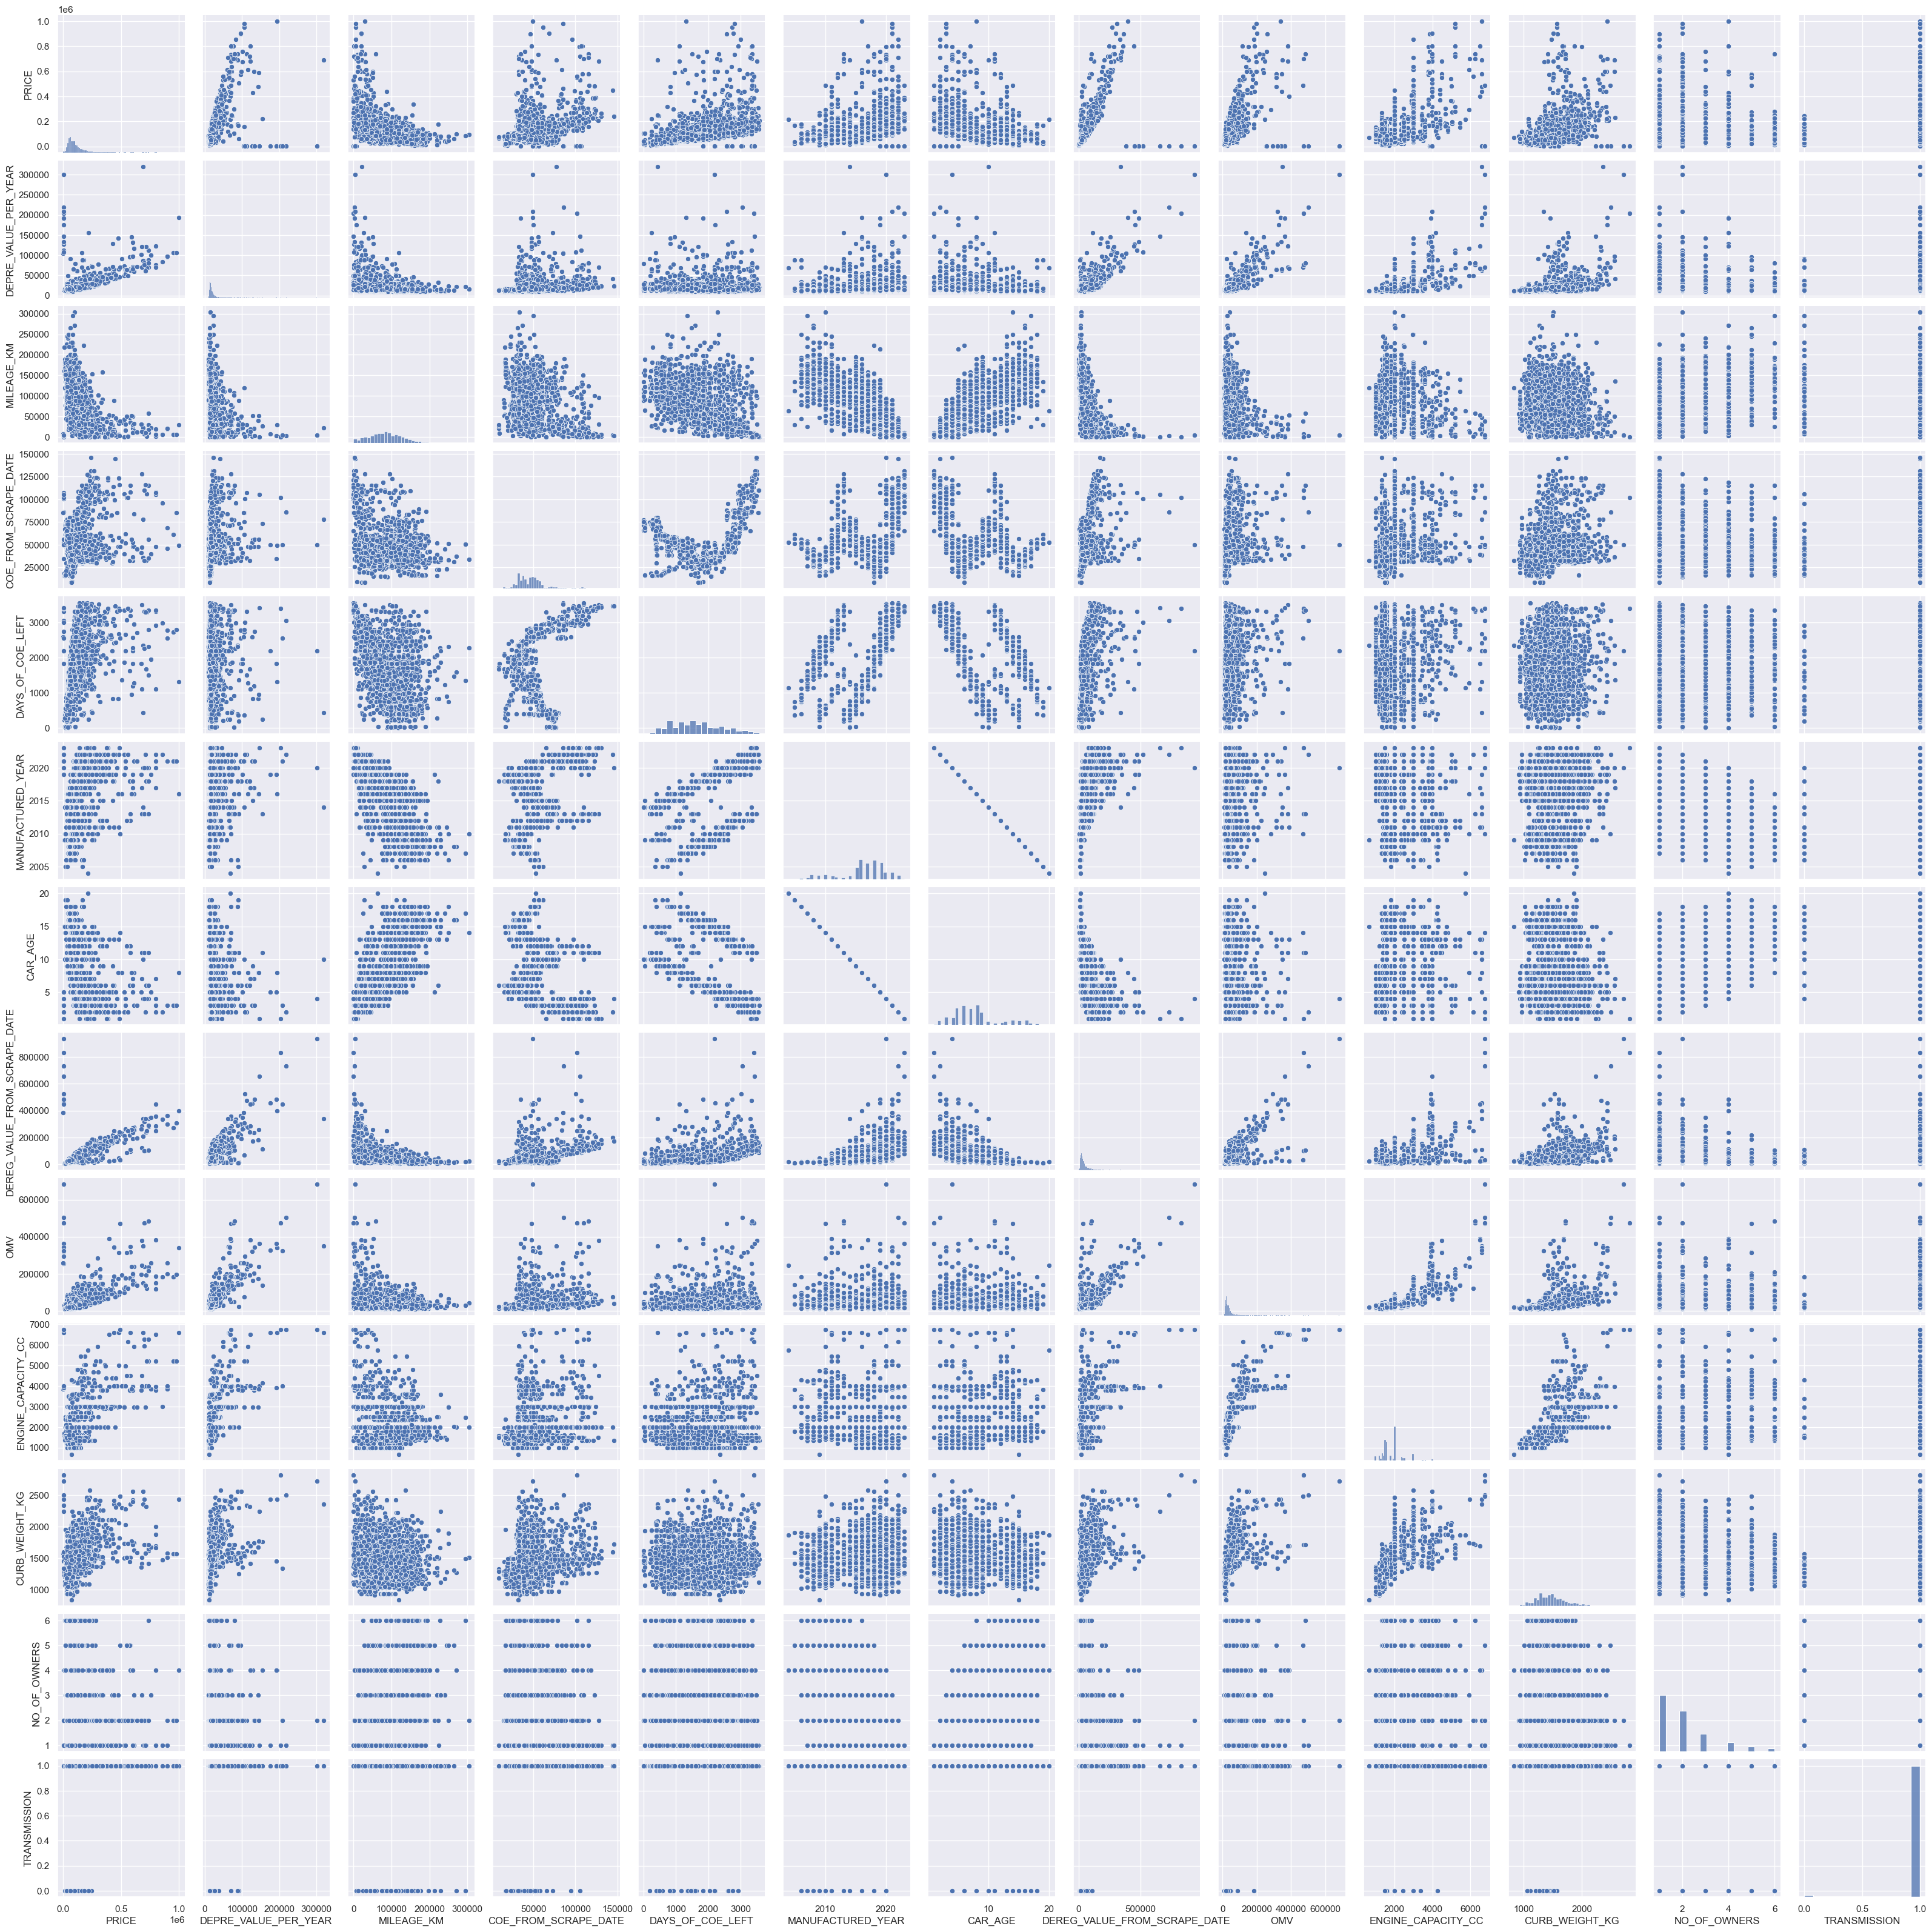

In [25]:
sb.pairplot(data=clean_df)

In [26]:
clean_df['LOG_PRICE'] = np.log10(clean_df['PRICE'])
clean_df.head()

,PRICE,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,MANUFACTURED_YEAR,CAR_AGE,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,TRANSMISSION,LOG_PRICE
0,92888.0,16350.0,75333.0,31101.0,1735.0,2018,6.0,34590.0,25699.0,1499.0,1490.0,1.0,1,4.967960
1,45800.0,16300.0,77000.0,46651.0,730.0,2016,8.0,25170.0,24571.0,1498.0,1589.0,2.0,1,4.660865
2,64800.0,13090.0,161163.0,25727.0,1499.0,2008,16.0,12737.0,20211.0,1595.0,1220.0,1.0,1,4.811575
4,87777.0,15290.0,109000.0,31302.0,1679.0,2018,6.0,38569.0,30333.0,1991.0,1644.0,2.0,1,4.943381
5,44600.0,14730.0,105500.0,47300.0,763.0,2016,8.0,26068.0,24806.0,1498.0,1589.0,1.0,1,4.649335


<Axes: xlabel='LOG_PRICE', ylabel='Count'>

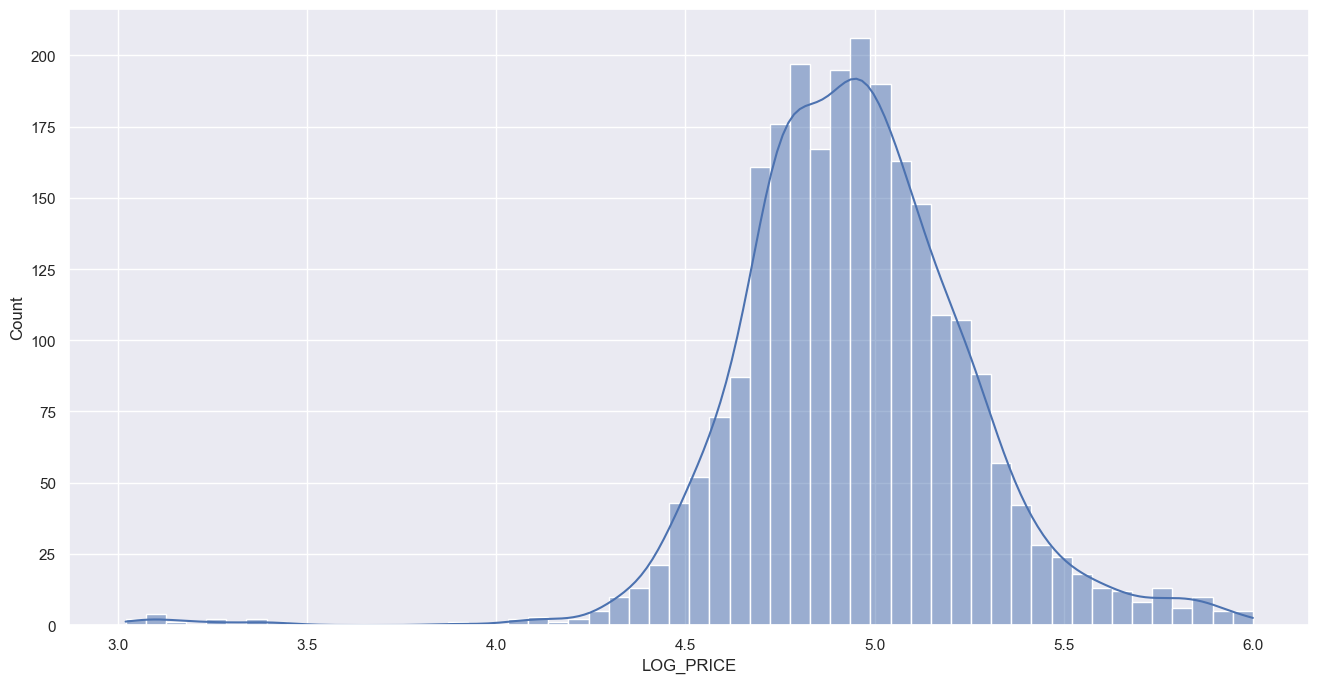

In [27]:
clean_df.drop(columns=['PRICE'])
f= plt.figure(figsize=(16,8))
sb.histplot(data=clean_df['LOG_PRICE'], kde=True)

In [28]:
clean_df.head()

,PRICE,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,MANUFACTURED_YEAR,CAR_AGE,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,TRANSMISSION,LOG_PRICE
0,92888.0,16350.0,75333.0,31101.0,1735.0,2018,6.0,34590.0,25699.0,1499.0,1490.0,1.0,1,4.967960
1,45800.0,16300.0,77000.0,46651.0,730.0,2016,8.0,25170.0,24571.0,1498.0,1589.0,2.0,1,4.660865
2,64800.0,13090.0,161163.0,25727.0,1499.0,2008,16.0,12737.0,20211.0,1595.0,1220.0,1.0,1,4.811575
4,87777.0,15290.0,109000.0,31302.0,1679.0,2018,6.0,38569.0,30333.0,1991.0,1644.0,2.0,1,4.943381
5,44600.0,14730.0,105500.0,47300.0,763.0,2016,8.0,26068.0,24806.0,1498.0,1589.0,1.0,1,4.649335


### LINEAR REGRESSION

In [29]:
y= pd.DataFrame(clean_df['PRICE'])
x= pd.DataFrame(clean_df[['DEPRE_VALUE_PER_YEAR','MILEAGE_KM','DEREG_VALUE_FROM_SCRAPE_DATE','OMV','COE_FROM_SCRAPE_DATE','DAYS_OF_COE_LEFT','CAR_AGE','ENGINE_CAPACITY_CC','CURB_WEIGHT_KG','NO_OF_OWNERS','TRANSMISSION']])

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

print("Train Set: ", y_train.shape, x_train.shape)
print("Test Set: ", y_test.shape, x_test.shape)

Train Set:  (1978, 1) (1978, 11)
Test Set:  (495, 1) (495, 11)


In [31]:
x_train.describe()

,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,CAR_AGE,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,TRANSMISSION
count,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000
mean,21630.020222,84834.010617,51040.472194,40670.944388,48509.269970,1632.359454,7.705258,1941.971689,1484.478766,2.023761,0.986855
std,19316.354617,44410.338887,60809.017190,46325.646749,18946.866146,783.288121,3.659175,787.052160,273.721075,1.223171,0.113923
min,9550.000000,18.000000,2384.000000,8264.000000,8501.000000,2.000000,1.000000,659.000000,840.000000,1.000000,0.000000
25%,14360.000000,54464.000000,23158.000000,19585.250000,35990.000000,1001.250000,5.000000,1496.000000,1295.000000,1.000000,1.000000
50%,16820.000000,83211.500000,34355.000000,28260.000000,46489.000000,1554.000000,7.000000,1796.000000,1450.000000,2.000000,1.000000
75%,21790.000000,114600.000000,55881.000000,42617.750000,54915.250000,2220.000000,9.000000,1998.000000,1626.000000,3.000000,1.000000
max,319820.000000,304000.000000,935423.000000,683397.000000,146002.000000,3563.000000,19.000000,6749.000000,2819.000000,6.000000,1.000000


In [32]:
y_train.describe()

,PRICE
count,1978.000000
mean,114246.132457
std,105083.182445
min,1050.000000
25%,57575.000000
50%,86800.000000
75%,132597.000000
max,998899.000000


In [33]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(x_train,y_train)

print("Intercept of Regression\t: b = ",linreg.intercept_)
print("Coefficients of Regression\t: a = ", linreg.coef_)
print()

pd.DataFrame(list(zip(x_train.columns, linreg.coef_[0])),columns=["Predictors","Coefficients"])

Intercept of Regression	: b =  [-45487.16046344]
Coefficients of Regression	: a =  [[ 1.60155446e+00 -2.86346147e-01 -2.28346578e-01  6.35788207e-02
   3.19448086e-01  4.30739639e+01 -5.07334834e+03  4.50877672e+01
   2.42843185e+01  2.11043560e+03 -1.63590664e+04]]



,Predictors,Coefficients
0,DEPRE_VALUE_PER_YEAR,1.601554
1,MILEAGE_KM,-0.286346
2,DEREG_VALUE_FROM_SCRAPE_DATE,-0.228347
3,OMV,0.063579
4,COE_FROM_SCRAPE_DATE,0.319448
5,DAYS_OF_COE_LEFT,43.073964
6,CAR_AGE,-5073.348338
7,ENGINE_CAPACITY_CC,45.087767
8,CURB_WEIGHT_KG,24.284318
9,NO_OF_OWNERS,2110.435599


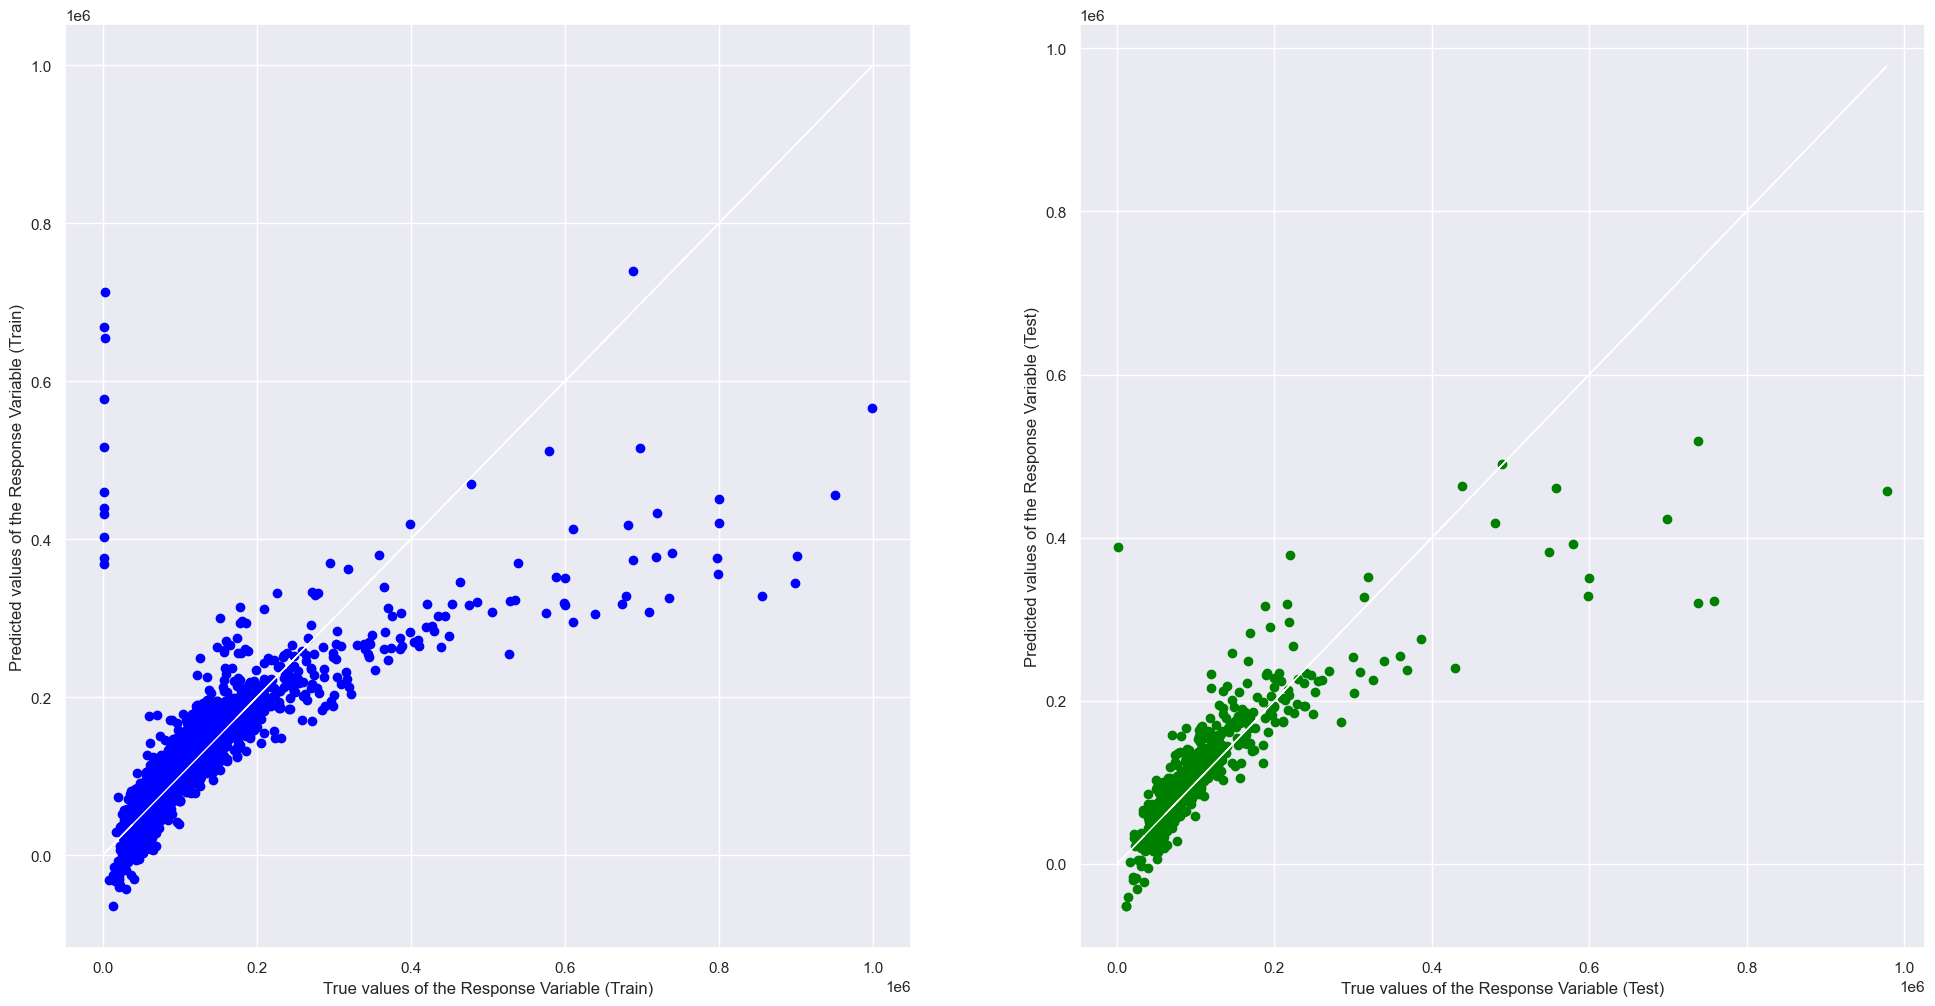

In [34]:
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

f, axes = plt.subplots(1,2,figsize=(24,12))
axes[0].scatter(y_train,y_train_pred, color="blue")
axes[0].plot(y_train,y_train,'w-',linewidth=1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred,color="green")
axes[1].plot(y_test,y_test,'w-',linewidth=1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:",linreg.score(x_train,y_train))
print("Mean Squared Error (MSE) \t:",mean_squared_error(y_train,y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5924324626974145
Mean Squared Error (MSE) 	: 4498279130.747392

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7084553951128343
Mean Squared Error (MSE) 	: 3409883503.234506



### Linear regression on Depre value per year

In [36]:
b= pd.DataFrame(clean_df['DEPRE_VALUE_PER_YEAR'])
a= pd.DataFrame(clean_df[['MILEAGE_KM','DEREG_VALUE_FROM_SCRAPE_DATE','OMV','COE_FROM_SCRAPE_DATE','DAYS_OF_COE_LEFT','CAR_AGE','TRANSMISSION','ENGINE_CAPACITY_CC','CURB_WEIGHT_KG','NO_OF_OWNERS']])

In [37]:
from sklearn.model_selection import train_test_split

a_train, a_test, b_train, b_test = train_test_split(a,b,test_size=0.25)

print("Train Set :", b_train.shape, a_train.shape)
print("Test Set  :", b_test.shape, a_test.shape)

Train Set : (1854, 1) (1854, 10)
Test Set  : (619, 1) (619, 10)


In [38]:
b_train.describe()

,DEPRE_VALUE_PER_YEAR
count,1854.000000
mean,21358.101402
std,18161.153054
min,9550.000000
25%,14210.000000
50%,16685.000000
75%,21890.000000
max,319820.000000


In [39]:
a_train.describe()

,MILEAGE_KM,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,CAR_AGE,TRANSMISSION,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS
count,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000
mean,85334.477346,50248.683387,41283.319310,48278.816613,1655.459547,7.867853,0.985437,1955.169364,1483.622438,2.064725
std,44767.088448,56949.242302,47898.851709,18984.241080,787.319502,3.788572,0.119828,819.054551,268.725488,1.266922
min,10.000000,2384.000000,8264.000000,8556.000000,2.000000,1.000000,0.000000,659.000000,840.000000,1.000000
25%,53377.500000,23060.750000,19654.750000,35403.000000,1006.000000,5.000000,1.000000,1496.000000,1295.000000,1.000000
50%,83750.000000,34696.000000,28752.500000,46118.000000,1586.000000,7.000000,1.000000,1796.000000,1450.000000,2.000000
75%,115000.000000,56060.000000,42862.000000,54920.000000,2283.750000,9.000000,1.000000,1998.000000,1625.000000,3.000000
max,304000.000000,935423.000000,683397.000000,146002.000000,3561.000000,19.000000,1.000000,6749.000000,2720.000000,6.000000


In [40]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(a_train,b_train)

print("Intercept of Regression\t: b = ",linreg.intercept_)
print("Coefficients of Regression\t: a = ", linreg.coef_)
print()

pd.DataFrame(list(zip(a_train.columns, linreg.coef_[0])),columns=["Predictors","Coefficients"])

Intercept of Regression	: b =  [29118.39755281]
Coefficients of Regression	: a =  [[-3.60100719e-02  1.85619302e-01  1.48506140e-01 -7.74023996e-02
  -6.11255548e+00  5.46518164e+01 -8.55980598e+03  2.03976182e+00
  -1.86804649e+00  2.41770320e+02]]



,Predictors,Coefficients
0,MILEAGE_KM,-0.036010
1,DEREG_VALUE_FROM_SCRAPE_DATE,0.185619
2,OMV,0.148506
3,COE_FROM_SCRAPE_DATE,-0.077402
4,DAYS_OF_COE_LEFT,-6.112555
5,CAR_AGE,54.651816
6,TRANSMISSION,-8559.805981
7,ENGINE_CAPACITY_CC,2.039762
8,CURB_WEIGHT_KG,-1.868046
9,NO_OF_OWNERS,241.770320


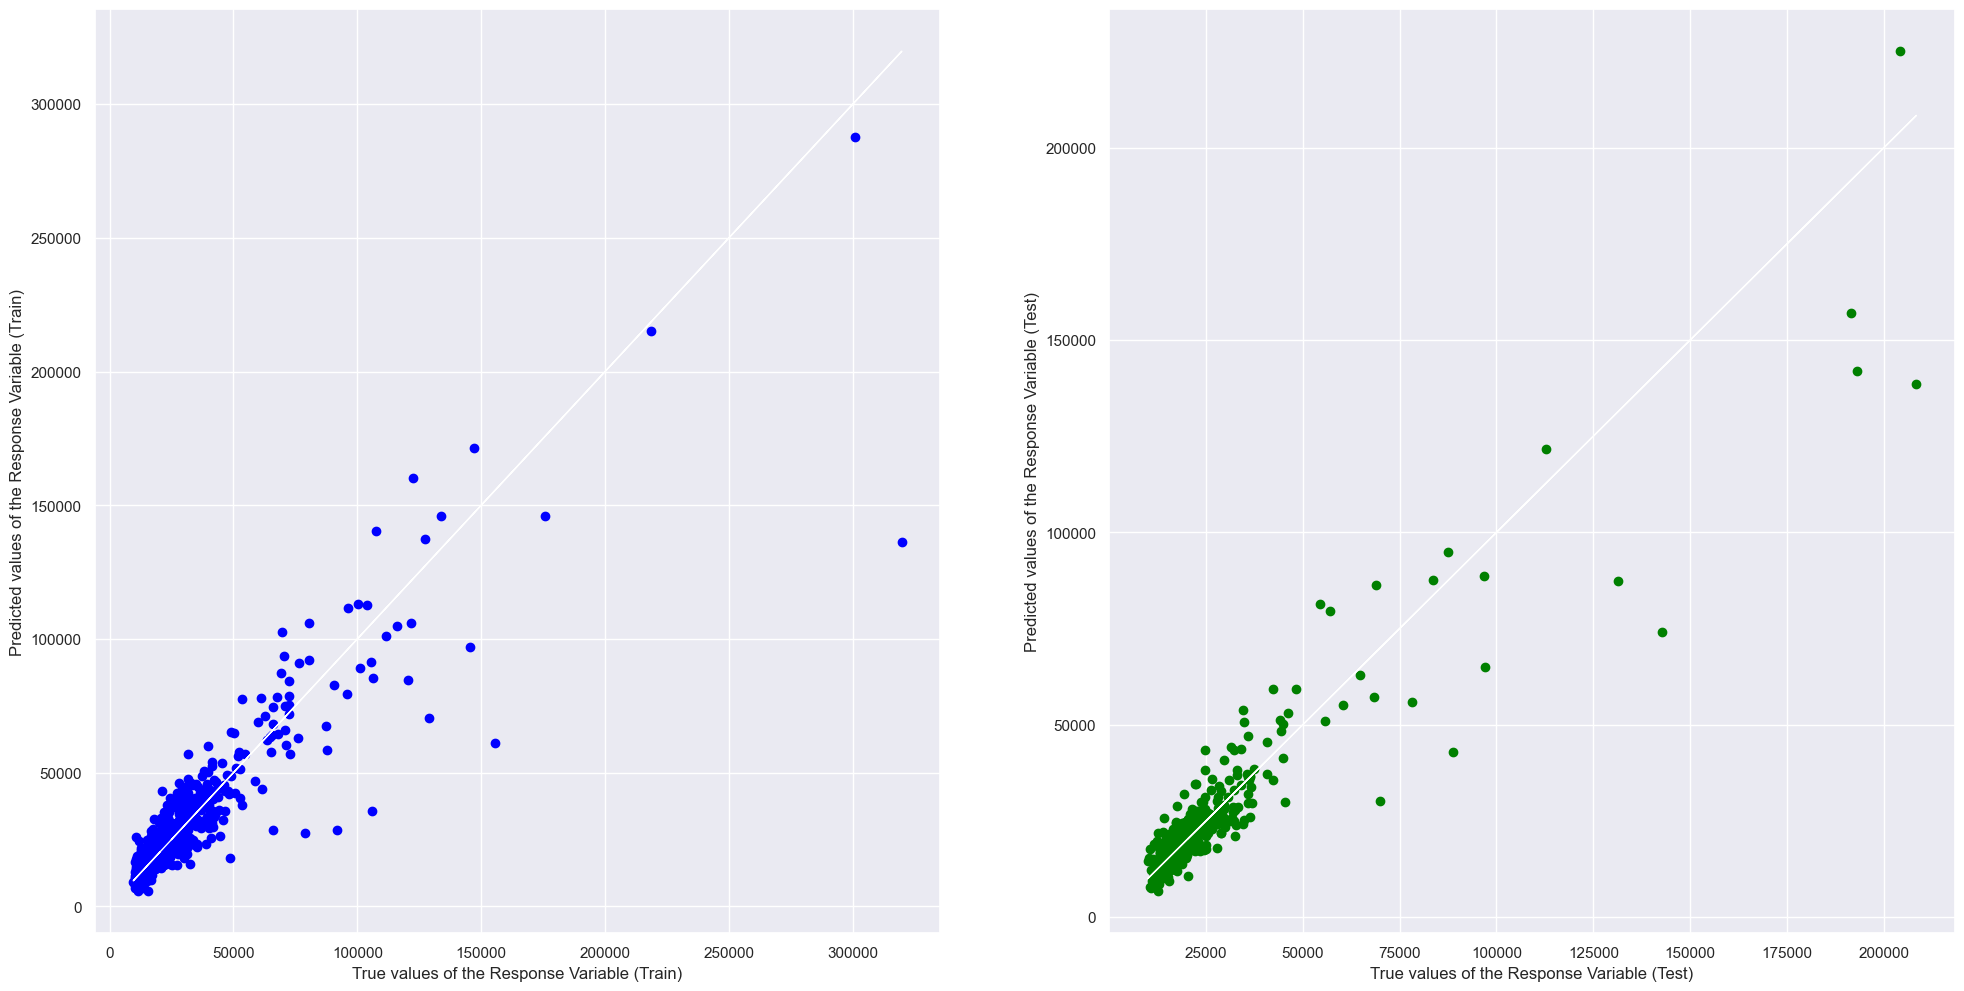

In [41]:
b_train_pred = linreg.predict(a_train)
b_test_pred = linreg.predict(a_test)

f, axes = plt.subplots(1,2,figsize=(24,12))
axes[0].scatter(b_train,b_train_pred, color="blue")
axes[0].plot(b_train,b_train,'w-',linewidth=1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(b_test, b_test_pred,color="green")
axes[1].plot(b_test,b_test,'w-',linewidth=1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error,r2_score

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:",linreg.score(a_train,b_train))
print("Mean Squared Error (MSE) \t:",mean_squared_error(b_train,b_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(a_test, b_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(b_test, b_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8295277162940239
Mean Squared Error (MSE) 	: 56196116.68825482

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.865569915096307
Mean Squared Error (MSE) 	: 50750398.30642354



### RANDOM FOREST REGRESSION

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [44]:
X = pd.DataFrame(clean_df[['MILEAGE_KM','DEREG_VALUE_FROM_SCRAPE_DATE','OMV','COE_FROM_SCRAPE_DATE','DAYS_OF_COE_LEFT','CAR_AGE','TRANSMISSION','ENGINE_CAPACITY_CC','CURB_WEIGHT_KG','NO_OF_OWNERS']])
y = pd.DataFrame(clean_df['DEPRE_VALUE_PER_YEAR'])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=69)

In [46]:
rf_regressor = RandomForestRegressor(n_estimators=100)

# Training the model
rf_regressor.fit(X_train, y_train)

# Predicting on the test set
y_train_pred = rf_regressor.predict(X_train)
y_pred = rf_regressor.predict(X_test)

/Users/nathanpua/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


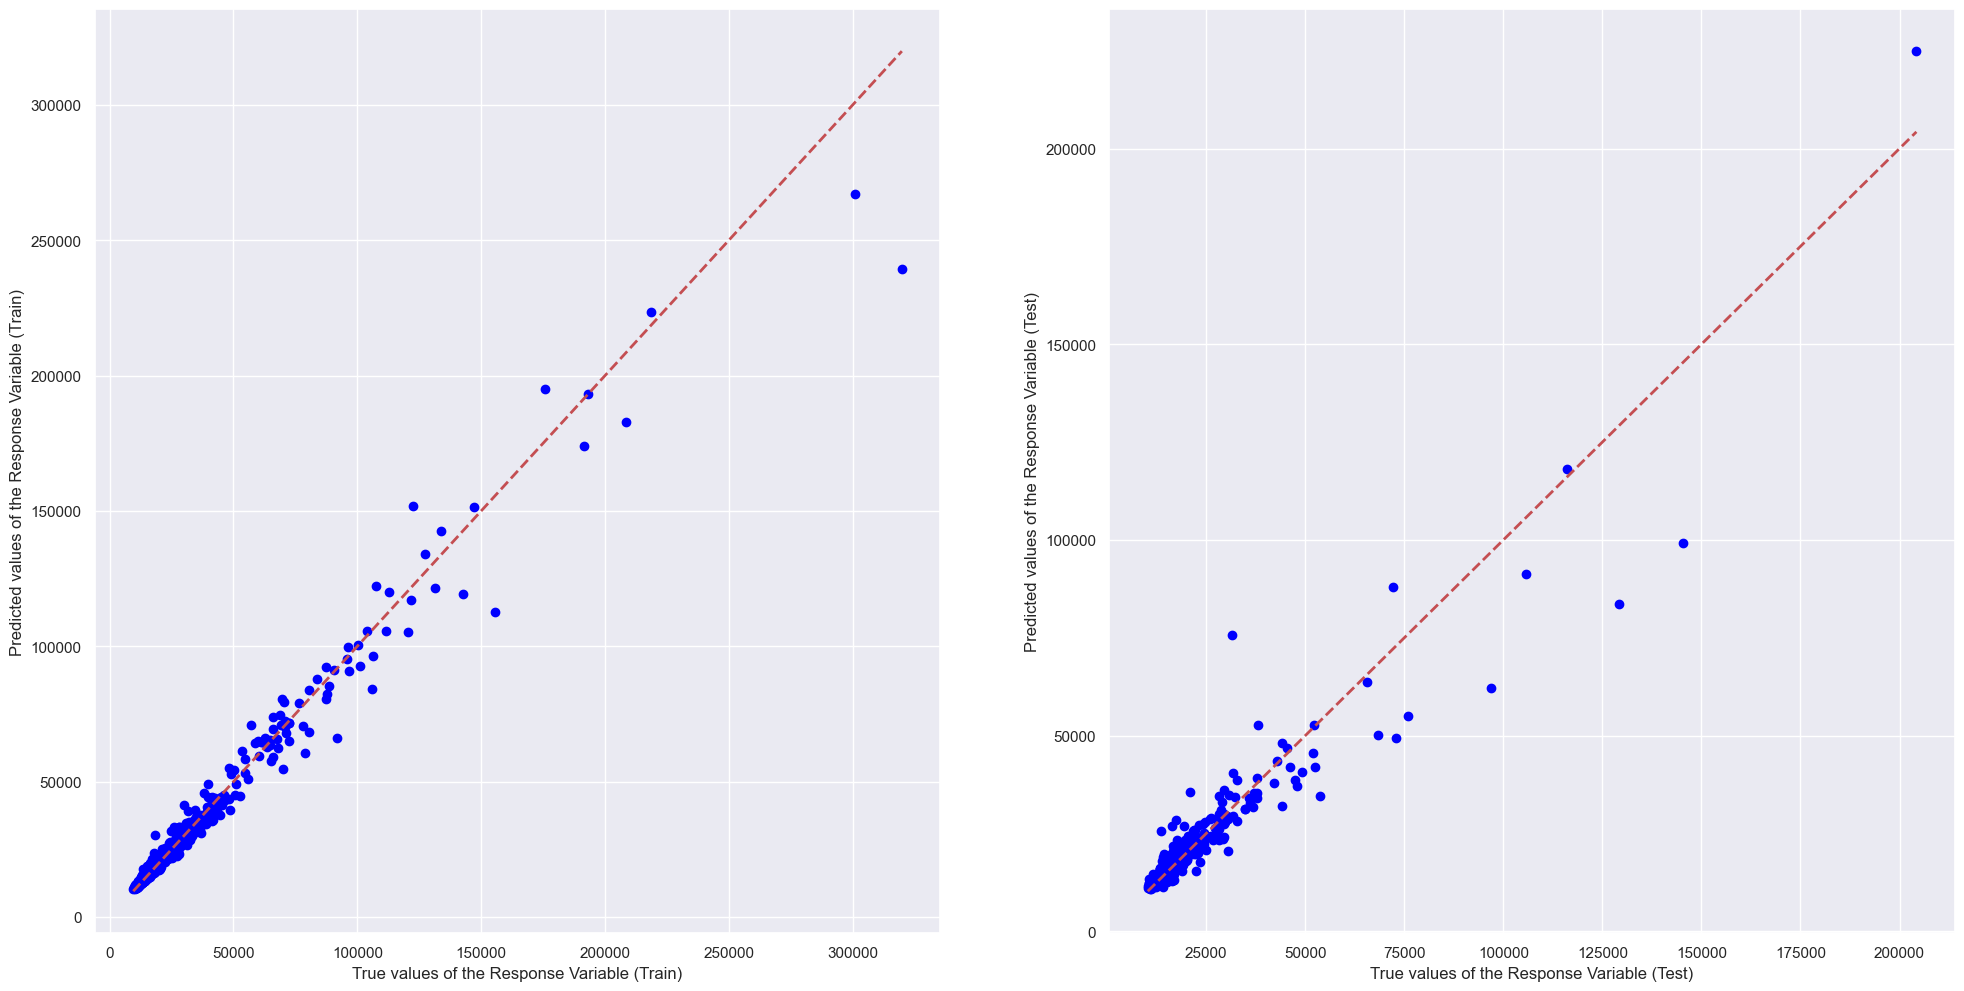

In [47]:

f, axes = plt.subplots(1,2,figsize=(24,12))
axes[0].scatter(y_train,y_train_pred, color="blue")
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [48]:
# Calculating Mean Squared Error

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:",r2_score(y_train,y_train_pred))
print("Mean Squared Error (MSE) \t:",mean_squared_error(y_train,y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_test, y_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9738735553141348
Mean Squared Error (MSE) 	: 9526945.668336703

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.893855876408218
Mean Squared Error (MSE) 	: 16649222133.722364



##### APPLYING K-FOLDS CROSS VALIDATION

In [49]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=420)

# Perform K-fold cross-validation
scores = cross_val_score(rf_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = -np.mean(scores)
std_score = np.std(scores)

print(f"Mean Squared Error (K-fold Cross-Validation): {mean_score:.2f} ± {std_score:.2f}")

explained_variances = cross_val_score(rf_regressor, X, y, cv=kf, scoring='explained_variance')

# Calculate the average explained variance
avg_explained_variance = np.mean(explained_variances)

print(f"Average Explained Variance (K-fold Cross-Validation): {avg_explained_variance:.3f}")

/Users/nathanpua/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nathanpua/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nathanpua/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nathanpua/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

Mean Squared Error (K-fold Cross-Validation): 59423463.55 ± 43637953.25


/Users/nathanpua/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nathanpua/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nathanpua/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nathanpua/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

Average Explained Variance (K-fold Cross-Validation): 0.840


### POLYNOMIAL REGRESSION

In [50]:
X = pd.DataFrame(clean_df[['MILEAGE_KM','DEREG_VALUE_FROM_SCRAPE_DATE','OMV','COE_FROM_SCRAPE_DATE','DAYS_OF_COE_LEFT','CAR_AGE','TRANSMISSION','ENGINE_CAPACITY_CC','CURB_WEIGHT_KG','NO_OF_OWNERS']])
y = pd.DataFrame(clean_df['DEPRE_VALUE_PER_YEAR'])

Train RMSE: 37065951.34947921
Test RMSE: 31234889.49872002

Train RMSE: 6088.181284216101
Test RMSE: 5588.818256010838

Train Explained Variance Score: 0.8898466632605034
Test Explained Variance Score: 0.9135291629586151


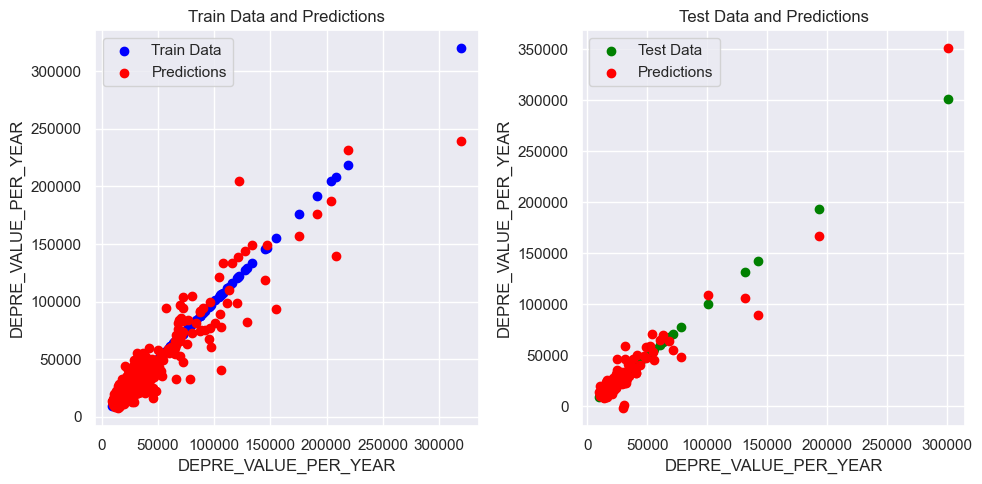

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=304)
from sklearn.preprocessing import PolynomialFeatures
# Polynomial features transformation
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Predictions
y_train_pred = poly_reg.predict(X_train_poly)
y_test_pred = poly_reg.predict(X_test_poly)

# Calculate MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Train RMSE: {train_mse}')
print(f'Test RMSE: {test_mse}')
print()

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print()

#R2
train_explained_variance = r2_score(y_train, y_train_pred)
test_explained_variance = r2_score(y_test, y_test_pred)
print(f'Train Explained Variance Score: {train_explained_variance}')
print(f'Test Explained Variance Score: {test_explained_variance}')

# Plotting
fig = plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train, color='blue', label='Train Data')
plt.scatter(y_train, y_train_pred, color='red', label='Predictions')
plt.xlabel('DEPRE_VALUE_PER_YEAR')
plt.ylabel('DEPRE_VALUE_PER_YEAR')
plt.title('Train Data and Predictions')
plt.legend()

# Plotting test data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test, color='green', label='Test Data')
plt.scatter(y_test, y_test_pred, color='red', label='Predictions',)
plt.xlabel('DEPRE_VALUE_PER_YEAR')
plt.ylabel('DEPRE_VALUE_PER_YEAR')
plt.title('Test Data and Predictions')
plt.legend()

plt.tight_layout()
plt.show()

##### K-FOLDS CROSS VALIDATION

In [52]:
kf = KFold(n_splits=5, shuffle=True, random_state=420)

# Perform K-fold cross-validation
scores = cross_val_score(poly_reg, X, y, cv=kf, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = -np.mean(scores)
std_score = np.std(scores)

print(f"Mean Squared Error (K-fold Cross-Validation): {mean_score:.2f} ± {std_score:.2f}")

explained_variances = cross_val_score(rf_regressor, X, y, cv=kf, scoring='explained_variance')

# Calculate the average explained variance
avg_explained_variance = np.mean(explained_variances)

print(f"Average Explained Variance (K-fold Cross-Validation): {avg_explained_variance:.3f}")

Mean Squared Error (K-fold Cross-Validation): 57287367.39 ± 37829675.43


/Users/nathanpua/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nathanpua/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nathanpua/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nathanpua/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

Average Explained Variance (K-fold Cross-Validation): 0.847
